# AegisLens: Explainable Phishing Detector
model_training_dataset3.ipynb - Analysis for Dataset 3

---

## 1. Project Setup

In [1]:
import pandas as pd
import os
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


## 2. Data Acquisition for Dataset #3
This notebook focuses on the "Web Page Phishing Dataset" from Kaggle.
Source: [danielfernandon/web-page-phishing-dataset](https://www.kaggle.com/datasets/danielfernandon/web-page-phishing-dataset)

In [2]:
# Define the dataset path and the local directory to store it
dataset_path = 'danielfernandon/web-page-phishing-dataset'
data_dir = 'data'
# The file inside this dataset is named 'phishing_data.csv'
file_name_ds3 = 'web-page-phishing.csv'
file_path_ds3 = os.path.join(data_dir, file_name_ds3)

# Create the data directory if it doesn't exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Directory '{data_dir}' created.")

# Download the dataset if it doesn't already exist
if not os.path.exists(file_path_ds3):
    print("Dataset #3 not found locally. Downloading from Kaggle...")
    try:
        kaggle.api.dataset_download_files(dataset_path, path=data_dir, unzip=True)
        print("Dataset #3 downloaded and unzipped successfully.")
    except Exception as e:
        print(f"An error occurred during download: {e}")
else:
    print("Dataset #3 already exists locally.")

Dataset #3 not found locally. Downloading from Kaggle...
Dataset URL: https://www.kaggle.com/datasets/danielfernandon/web-page-phishing-dataset
Dataset #3 downloaded and unzipped successfully.


## 3. Load Dataset and Initial Exploration
Load the data and perform a quick health check.

In [3]:
try:
    df3 = pd.read_csv(file_path_ds3)
    print("\nDataset #3 loaded successfully. Here's a preview:")
    display(df3.head())
except FileNotFoundError:
    print(f"Error: The file {file_path_ds3} was not found. Please check the download step.")


Dataset #3 loaded successfully. Here's a preview:


,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## 4. Initial Exploratory Data Analysis (EDA)


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 n

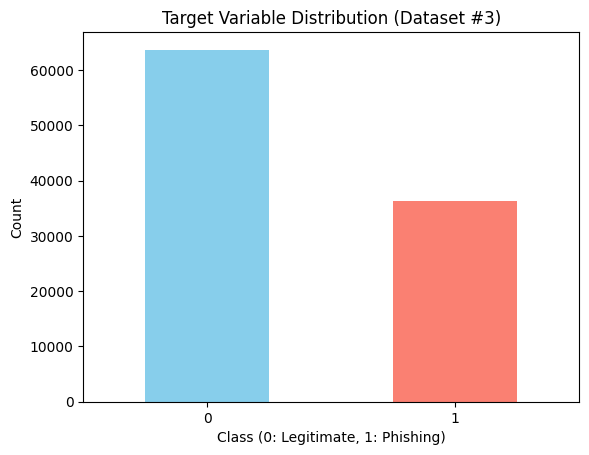

In [4]:
# Get a concise summary of the DataFrame.
print("\n--- DataFrame Info ---")
df3.info()

# Check for any missing values.
missing_values_ds3 = df3.isnull().sum().sum()
print(f"\nTotal number of missing values in the dataset: {missing_values_ds3}")
if missing_values_ds3 == 0:
    print("Great! Dataset #3 is clean with no missing values.")

# Check the balance of our target variable ('phishing').
# 1 indicates a phishing URL, 0 indicates a legitimate URL.
print("\n--- Target Variable Distribution ---")
if 'phishing' in df3.columns:
    print(df3['phishing'].value_counts())
    # Visualize the distribution
    df3['phishing'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], rot=0)
    plt.title('Target Variable Distribution (Dataset #3)')
    plt.xlabel('Class (0: Legitimate, 1: Phishing)')
    plt.ylabel('Count')
    plt.show()
else:
    print("Warning: Target column 'phishing' not found.")


# Part 2: Model Benchmarking

---
## 5. Data Preparation and Model Training Setup

In [5]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Define features (X) and target (y) for Dataset #3
# X will contain all columns except the target, 'phishing'.
X_ds3 = df3.drop('phishing', axis=1)

# y is our target variable.
y_ds3 = df3['phishing']

print(f"Shape of features (X_ds3): {X_ds3.shape}")
print(f"Shape of target (y_ds3): {y_ds3.shape}")

Shape of features (X_ds3): (100077, 19)
Shape of target (y_ds3): (100077,)


## 6. Splitting the Data
We use stratify=y_ds3 to ensure the class imbalance is preserved in both our training and testing sets.

In [8]:
X_train_ds3, X_test_ds3, y_train_ds3, y_test_ds3 = train_test_split(
    X_ds3, y_ds3,
    test_size=0.2,
    stratify=y_ds3,
    random_state=42
)
print("\nDataset #3 split into training and testing sets.")


Dataset #3 split into training and testing sets.


## 7. Model Training and Evaluation
### Logistic Regression

In [9]:
# Dictionary to store the performance of models on this dataset
model_performance_ds3 = {}

# --- Model 1: Logistic Regression ---
print("\n--- Training Logistic Regression on Dataset #3 ---")
start_time = time.time()
log_reg_ds3 = LogisticRegression(max_iter=1000, random_state=42).fit(X_train_ds3, y_train_ds3)
y_pred_lr_ds3 = log_reg_ds3.predict(X_test_ds3)
lr_time_ds3 = time.time() - start_time
model_performance_ds3['Logistic Regression'] = [
    accuracy_score(y_test_ds3, y_pred_lr_ds3),
    precision_score(y_test_ds3, y_pred_lr_ds3),
    recall_score(y_test_ds3, y_pred_lr_ds3),
    f1_score(y_test_ds3, y_pred_lr_ds3),
    lr_time_ds3
]
print(f"Logistic Regression training complete in {lr_time_ds3:.2f}s")


--- Training Logistic Regression on Dataset #3 ---
Logistic Regression training complete in 13.27s


### Decision Tree Classifier

In [10]:
# --- Model 2: Decision Tree ---
print("\n--- Training Decision Tree on Dataset #3 ---")
start_time = time.time()
dec_tree_ds3 = DecisionTreeClassifier(random_state=42).fit(X_train_ds3, y_train_ds3)
y_pred_dt_ds3 = dec_tree_ds3.predict(X_test_ds3)
dt_time_ds3 = time.time() - start_time
model_performance_ds3['Decision Tree'] = [
    accuracy_score(y_test_ds3, y_pred_dt_ds3),
    precision_score(y_test_ds3, y_pred_dt_ds3),
    recall_score(y_test_ds3, y_pred_dt_ds3),
    f1_score(y_test_ds3, y_pred_dt_ds3),
    dt_time_ds3
]
print(f"Decision Tree training complete in {dt_time_ds3:.2f}s")


--- Training Decision Tree on Dataset #3 ---
Decision Tree training complete in 0.31s


### Random Forest

In [11]:
# --- Model 3: Random Forest ---
print("\n--- Training Random Forest on Dataset #3 ---")
start_time = time.time()
rf_clf_ds3 = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train_ds3, y_train_ds3)
y_pred_rf_ds3 = rf_clf_ds3.predict(X_test_ds3)
rf_time_ds3 = time.time() - start_time
model_performance_ds3['Random Forest'] = [
    accuracy_score(y_test_ds3, y_pred_rf_ds3),
    precision_score(y_test_ds3, y_pred_rf_ds3),
    recall_score(y_test_ds3, y_pred_rf_ds3),
    f1_score(y_test_ds3, y_pred_rf_ds3),
    rf_time_ds3
]
print(f"Random Forest training complete in {rf_time_ds3:.2f}s")


--- Training Random Forest on Dataset #3 ---
Random Forest training complete in 1.79s


### Gradient Boosting Classifier

In [12]:
# --- Model 4: Gradient Boosting ---
print("\n--- Training Gradient Boosting on Dataset #3 ---")
start_time = time.time()
gb_clf_ds3 = GradientBoostingClassifier(n_estimators=100, random_state=42).fit(X_train_ds3, y_train_ds3)
y_pred_gb_ds3 = gb_clf_ds3.predict(X_test_ds3)
gb_time_ds3 = time.time() - start_time
model_performance_ds3['Gradient Boosting'] = [
    accuracy_score(y_test_ds3, y_pred_gb_ds3),
    precision_score(y_test_ds3, y_pred_gb_ds3),
    recall_score(y_test_ds3, y_pred_gb_ds3),
    f1_score(y_test_ds3, y_pred_gb_ds3),
    gb_time_ds3
]
print(f"Gradient Boosting training complete in {gb_time_ds3:.2f}s")


--- Training Gradient Boosting on Dataset #3 ---
Gradient Boosting training complete in 7.31s


## 8. Final Model Comparison for Dataset #3


--- Final Model Performance Comparison (Dataset #3) ---


,Accuracy,Precision,Recall,F1-Score,Training Time (s)
Logistic Regression,0.856265,0.865602,0.715523,0.783440,13.265580
Decision Tree,0.882794,0.866429,0.800907,0.832381,0.312762
Random Forest,0.889888,0.860783,0.831431,0.845853,1.791018
Gradient Boosting,0.881145,0.831213,0.844356,0.837733,7.312948


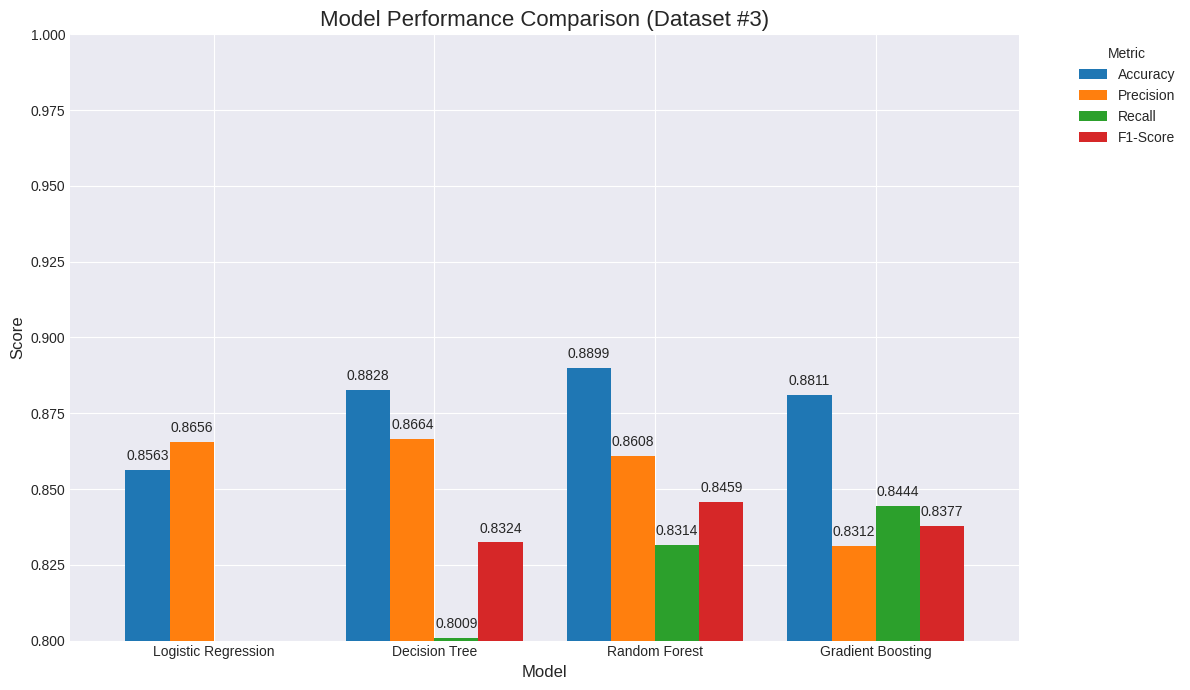

In [15]:
print("\n--- Final Model Performance Comparison (Dataset #3) ---")
performance_df_ds3 = pd.DataFrame.from_dict(
    model_performance_ds3,
    orient='index',
    columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time (s)']
)
display(performance_df_ds3)

# --- Visualize Model Performance ---
metrics_to_plot_ds3 = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
performance_to_plot_ds3 = performance_df_ds3[metrics_to_plot_ds3]

plt.style.use('seaborn-v0_8-darkgrid')
ax = performance_to_plot_ds3.plot(kind='bar', figsize=(12, 7), rot=0, width=0.8)
plt.title('Model Performance Comparison (Dataset #3)', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0.8, 1.0) # Adjust ylim based on results for better visualization
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

## 9. Select and Serialize the Model for Dataset#3
Based on the empirical evidence, the Random Forest classifier is once again the most robust and highest-performing model, even on this feature-poor dataset.

In [16]:
import joblib

# Select the champion model from this run
champion_model_ds3 = rf_clf_ds3
print(f"\nChampion model for Dataset #3 selected: {type(champion_model_ds3).__name__}")

# Create the models directory if it doesn't already exist
if not os.path.exists('models'):
    os.makedirs('models')
    print("Created 'models' directory.")

# Save the serialized model with a distinct name
model_filename_ds3 = 'models/url_model_ds3.joblib'
joblib.dump(champion_model_ds3, model_filename_ds3)

print(f"\nChampion model for Dataset #3 has been serialized to '{model_filename_ds3}'")


Champion model for Dataset #3 selected: RandomForestClassifier

Champion model for Dataset #3 has been serialized to 'models/url_model_ds3.joblib'
